<a id="s0"></a><h2 style="color:rgb(127,203,223)">6.0 Deep Learning - Eine Einführung</h2>

<a id="s1"></a><h3 style="color:rgb(127,203,223)">6.1 Deep Learning - was ist das eigentlich?</h3>

Deep Learning ist in den letzten Jahren ein regelrechtes Buzzword geworden. Dies liegt vor allem an den öffentlichkeitswirksamen Fortschritten, die in unterschiedlichen Disziplinen mit diesem Bereich des maschinellen Lernens erreicht worden sind. Genannt werden sollen an dieser Stelle bspw. <b>AlphaGo</b> (<a href="https://de.wikipedia.org/wiki/AlphaGo">wikipedia</a>,<a href="https://www.deepmind.com/research/highlighted-research/alphago">DeepMind</a>), <b>ChatGPT</b> (<a href="https://de.wikipedia.org/wiki/ChatGPT">wikipedia</a>), <b>AlphaFold</b> (<a href="https://en.wikipedia.org/wiki/AlphaFold">wikipedia</a>,<a href="https://www.deepmind.com/research/highlighted-research/alphafold">DeepMind</a>), <a href="https://en.wikipedia.org/wiki/DeepL_Translator"><b>DeepL</b></a> u.v.m.<br>
Doch was ist Deep Learning eigentlich und inwiefern unterscheidet es sich von den bisher besprochenen Verfahren?<br>
Tatsächlich ist diese Frage gar nicht ganz so einfach zu beantworten, da dieser Begriff ganz unterschiedliche Aspekte beinhaltet. Wir wollen die Beschreibung aus dem Buch <a href="https://www.amazon.de/Deep-Learning-Adaptive-Computation-Machine/dp/0262035618/ref=sr_1_1?__mk_de_DE=%C3%85M%C3%85%C5%BD%C3%95%C3%91&crid=3Q9Q8A6PK791X&keywords=Deep+Learning&qid=1656836054&sprefix=deep+learning%2Caps%2C77&sr=8-1&asin=0262035618&revisionId=&format=4&depth=1"><i>Deep Learning</i></a> mal an den Anfang stellen:<br><br>
<center><i>The hierarchy of concepts enables the computer to learn complicated concepts by building them out of simpler ones. If we draw a graph showing how these concepts are built on top of each other, the graph is deep, with many layers. For this reason, we call this approach to AI <b>deep learning</b></i></center><br>
<center>Quelle: Deep Learning (Ian Goodfellow, Yoshua Bengio, and Aaron Courville)</center><br><br>

Schauen wir uns die Erläuterung auf der englischen Wikipedia bzgl. des Begriffes <i>Deep learning</i> an, so finden wir dort die folgende einleitende Definition:<br><br>
<center><i><b>Deep learning</b> (also known as <b>deep structured learning</b>) is part of a broader family of machine learning methods based on artificial neural networks with representation learning</i></center><br><br>
    <center>Qelle: wikipedia</center><br>
Hier wird der Begriff des <b>representation learning</b> verwendet. Um diesen zu verstehen, soll kurz auf die <i>klassische</i> Bearbeitung von Bildern eingegangen werden. Vor der Verfügbarkeit von Deep learning wurde bei der automatisierten Verarbeitung von Bildern üblicherweise so vorgegangen, dass zunächst Merkmale aus dem Bild extrahiert worden sind. Hierbei handelte es sich in der Regel um Merkmalsvektoren, die basierend auf Verfahren der Bildverarbeitung definiert wurden. Häufig, aber nicht ausschließlich, handelte es sich dabei um Kanteninformationen. Die Merkmale wurden eher <i>ingenieurstechnisch</i> definiert und dann mit entsprechenden Algorithmen aus den Bildern extrahiert. Diese Merkmale wurden so <i>designed</i>, dass die für die jeweilige Aufgabenstellung relevante Information in den Merkmalen enthalten blieb, die Merkmale aber eine signifikante Dimensionsreduktion darstellten. Basierend auf diesen Merkmalsvektoren wurden dann eines oder ggf. auch mehrere der klassischen - Ihnen nun bereits teilweise bekannten - Verfahren aus dem Bereich Machine Learning angewendet. Der Prozess der Merkmalsdefinition und -Extraktion war also von dem der Klassifikation deutlich getrennt. Diese Unterscheidung, wie wir noch sehen werden, wird bei Verfahren des Deep Learning aufgelöst. Die tiefen neuronalen Netze "erlernen" basierend auf Beispielen <u>nicht nur</u> die eigentliche Klassifikation sondern <u>zusätzlich</u> auch die Art von Merkmalen, die besonders geeignet sind, die gestellte Aufgabe zu lösen. Da diese Merkmale die für die Aufgabenstellung relevante Information repräsentieren, sprechen wir hier auch von <i>representation learning</i>. Diese Repräsentationen, und da kommen wieder die tiefen Schichten zum Vorschein, werden hierarchisch "erlernt", komplexere Repräsentationen werden basierend auf einfacheren Repräsentationen erzeugt.<br><br>
<p style="text-align: center"><img src="pics/DeepLearning06.png" alt="Bild" style="height: 500px; width: 700px;"><br>Quelle: Wikipedia</p><br><br>
Wie wir im vorhergehenden Kapitel bereits gesehen haben, baut auch das Multilayer Perceptron auf so genannten <b>hidden layers</b> auf. Es zeigte sich jedoch rasch, dass diese nicht beliebig in ihrer Anzahl erhöht werden können ohne das das Netz seine Fähigkeit verliert, diese inneren Schichten auch zu trainieren. Dies lag zum einen in der Struktur des Trainings bedingt. Denken Sie daran, dass beim <a href="Chapter05.ipynb#s3">Backpropagation</a> die Ableitungen von der Ausgabeschicht zur Eingabeschicht propagiert werden. Aufgrund der Kettenregel werden diese miteinander multipliziert. Bei einem tiefen Netz kommt es somit zu einer großen Zahl an Faktoren. Denken Sie des Weiteren an die <a href="Chapter05.ipynb#s1">sigmoide Aktivierungsfunktion</a>. Befindet sich auf diesem Weg auch nur ein Neuron, dessen Anregung sehr groß oder sehr klein gewesen ist, so ist der Wert der Ableitung der Aktivierungsfunktion an dieser Stelle faktisch gleich Null. Hiermit wird somit das gesamte Produkt gleich Null und ein Training der weiteren Schichten kann nicht mehr stattfinden. Dieses Phänomen ist unter dem Begriff <b>vanishing gradient</b> bekannt. Dieses Problem, zusammen mit einer Reihe weiterer Probleme (Topologie der Netze, Initialisierung der Gewichte, ...) wurde im Kontext des <i>Deep Learning</i> aufgegriffen und auf unterschiedliche Weise gelöst oder zumindest abgemildert.<br>
Ein weiteres Problem zu Zeiten des Multilayer Perceptrons bestand auch sicherlich darin, dass weder die Datenmengen vorhanden waren, die uns heute zur Verfügung stehen, noch die notwendige Rechenleistung in Form moderner Graphikarten (GPUs). In der folgenden Abbildung ist die Größe der Datensätze über die Zeit abgebildet. <b>Man berücksichtige die logarithmische Auftragung!</b>   

<p style="text-align: center"><img src="pics/DeepLearning01.png" alt="Bild" style="height: 500px; width: 700px;"><br>Quelle: Deep Learnig (Ian Goodfellow, Yoshua Bengio, and Aaron Courville). Für weitere Details zu dieser Abbildung sei auf das Buch verwiesen.</p><br>

Da dieses Kapitel lediglich einen ersten Blick auf die Thematik des <b>Deep Learning</b> werfen kann, und dies auch nur exemplarisch und mit dem Fokus auf die Verarbeitung von Bildern erfolgen soll, konzentrieren wir uns nun auf eine spezielle Anwendung. Anhand dieser soll der grundsätzliche Aufbau eines so genannten <b>Convolutional Neural Network</b> erläutert und eingeführt werden. Im Anschluss schauen wir uns dann ein weiteres Beispiel zur Segmentierung von Bildern an, dass ebenfalls auf diesen Faltungsschichten basiert. Kommen wir also zunächst zur Aufgabenstellung und betrachten wir dann schrittweise den Aufbau des neuronalen Netzes.<br>

<a id="s2"></a><h3 style="color:rgb(127,203,223)">6.2 Number Classification</h3>

<p style="text-align: center"><img src="pics/DeepLearning02.png" alt="Bild" style="height: 500px; width: 600px;"><br>Quelle: Tensorflow</p><br>

In der obigen Abbildung sind Beispiele von handgeschriebenen Ziffern (0...9) dargestellt. Es handelt sich dabei um Grauwert-Bilder der Größe 28x28 Pixel. Die Datenbank beinhaltet (Quelle: <a href="https://www.tensorflow.org/datasets/catalog/mnist">Tensorflow</a>) 60.000 Trainings- und 10.000 Testbilder. Zu jedem Bild existiert ein Label, welches die jeweilige Zahl darstellt. Wir wollen nun ein neuronales Netz aufsetzen, welches in seiner Eingabeschicht jeweils ein ganzes Bild engegennimmt (28x28=784 Eingabeneuronen) und das über 10 Ausgabeneuronen verfügt. Jedes dieser Ausgabeneuronen gibt die "Wahrscheinlichkeit" dafür an, dass es sich um die jeweilige Zahl handelt. Alle Wahrscheinlichkeiten addieren sich zu Eins, es kommt also die Softmax-Funktion zum Einsatz.<br>
Wir wollen uns das Netzwerk, welches unter Verwendung des Frameworks <a href="https://www.tensorflow.org/"><b>tensorflow</b></a> erstellt worden ist, nun im Detail anschauen (es gibt eine Reihe weiterer Frameworks wie bspw. Pytorch, matlab, ...):

Schauen wir uns den Programm-code abschnittweise an. Sie werden einiges wiedererkennen, da Sie es bereits im Zusammenhang mit dem Multilayer Perceptron kennengelernt haben. Einiges ist aber auch dezidiert neu, so dass wir darauf etwas genauer eingehen werden.

<p style="text-align: center"><img src="pics/DeepLearning03.png" alt="Bild" style="height: 300px; width: 900px;"><br>Code-Abschnitt 1</p><br>

In diesem ersten Code-Abschnitt importieren wir zunächst die relevanten Python-Bibliotheken. Neu ist hierbei im wesentlichen die Bibliothek <b>tensorflow</b>. Wir legen die Lernrate, die dieselbe Bedeutung wie beim MLP besitzt sowie die Anzahl der beim Training zu verwendenden Epochen fest. Im Anschluss daran werden Trainings- und Testdatensatz eingelesen. Hierzu wird eine Standardfunktion innerhalb von tensorflow verwendet. Das Konzept ähnelt dem, welches Ihnen bereits von sklearn geläufig ist. Unter Verwendung der numpy-Funktion <i>reshape</i> wird das Format des arrays entsprechend der tensorflow-Syntax angepasst. Sie erkennen an der <i>input_shape</i>, dass jedes Bild die Größe von $28x28$ Pixeln besitzt und über einen Channel verfügt. Das bedeutet, dass es sich um ein Grauwertbild handelt. Bei einem Farbbild würden hier 3 Channel vorliegen (jeweils einer für den roten, grünen und blauen Kanal).

<p style="text-align: center"><img src="pics/DeepLearning04.png" alt="Bild" style="height: 300px; width: 900px;"><br>Code-Abschnitt 2</p><br>

Nachdem wir den zu verwendenden Datentypen (float32) für die Trainings- und Testdaten festegelegt haben, dividieren wir noch durch 255. Da es sich um 8-Bit Bilder handelt, entspricht der maximale Grauwert (=weiß) der $2^8 -1 = 255$. Auf diese Weise erreichen wir, dass alle Pixelwerte zwischen Null und Eins liegen. Sie hatten bereits in der Vergangenheit gesehen, dass eine diesbezügliche Vorverarbeitung der Daten für das anschließende Training von Vorteil sein kann. Im Anschluss daran legen wir die Eingabeschicht des Netzwerkes fest und führen (siehe auch lambda-Kalkül bei Python) die Normalisierung durch, die ja auch bei der Inferenz (Prädiktion), also der Anwendung des neuronalen Netzes, zur Anwendung kommen soll. 

<p style="text-align: center"><img src="pics/DeepLearning05.png" alt="Bild" style="height: 150px; width: 1100px;"><br>Code-Abschnitt 3</p><br>

In diesem Abschnitt wird das eigentliche neuronale Netz definiert. Hier kommen vier verschiedene neue Elemente zum Einsatz, die im folgenden vorgestellt werden. Zunächst wird eine so genannte Faltungsschicht (Convolution-Layer) definiert. Dieser verfügt über $28$ Aktivierungskarten (Activation Maps) und jeweils einem Kernel der Größe $3x3$. Diese Schicht, die einer ganzen Klasse von tiefen neuronalen Netzen ihren Namen gegeben hat (<b>Convolutional Neural Networks</b>) wollen wir uns etwas genauer anschauen. Diejenigen, die das Modul <b>Bildverarbeitung</b> belegt hatten, kennen bereits die Faltung von Bildern mit Filtermasken. Hierbei wird eine Maske (Matrix, Kernel) - in diesem Fall ist es eine $3x3$-Matrix - über das Bild geschoben und die entsprechenden Einträge mit den darunter befindlichen Pixelwerten multipliziert. Die einzelnen Produkte werden dann aufsummiert und ergeben den Wert im Ergebnisbild (an der Stelle der Filtermaske). Mit Hilfe solcher Filtermasken lassen sich Bilder glätten, Kanten hervorheben und vieles mehr. In diesem Fall sollen also 28 verschiedene solcher Filtermasken erstellt (<b>erlernt</b>) werden, die jeweils die Größe $3x3$ Pixel besitzen. Da bei der Faltung an den Rändern des Bildes das Problem auftritt, dass die Filtermasken über das Bild hinausragen, muss eine gesonderte Randbehandlung definiert werden. Hier wird mit dem Parameter <i>padding='same'</i> erreicht, dass ein zusätzlicher Rahmen um das Bild gelegt wird, der mit Nullen aufgefüllt wird. Neben der Aktivierungsfunktion, hier kommt eine <i>Rectified Linear Unit</i> zum Einsatz, wird auch noch vorgegeben, wie die Gewichte dieser Schicht initialisiert werden sollen. <b>Wie lässt sich so eine Faltung nun als Schicht in einem neuronalen Netz darstellen?</b><br>
Schauen wir uns dazu die folgende Abbildung an.<br><br>

In [1]:
from IPython.display import IFrame
IFrame(src='https://www.geogebra.org/m/cdj84tmt', width=800, height=600)

In der obigen Abbildung ist der Input-Layer in blau dargestellt. Die Input-Neuronen sind bereits wie die Pixel des Bildes angeordnet. Jedes Neuron der Folgeschicht (erste Faltungsschicht) ist nun nicht mit allen Neuronen der Eingabeschicht verbunden sondern stattdessen nur mit $9$ Neuronen gemäß der vorgegebenen Kernel-Größe von $3x3$. Zu jeder der $9$ Verbindungen gehören demnach auch jeweils ein Gewicht, in Summe also $9$ Gewichte. Nun ist es jedoch nicht so, dass jedes Neuron $9$ eigene Gewichte besitzt sondern stattdessen gibt es nur $9$ verschiedene Gewichte für diese Faltungsschicht und dieses Kernel. Einander entsprechende Verbindungen teilen sich jeweils ein Gewicht. Es kommt dann lediglich noch ein <i>Bias</i> hinzu. Das macht in Folge dessen also $9$ Gewichte plus einem Bias pro Kernel. Da wir $28$ verschiedene Kernel vorgegeben haben, brauchen wir für die Faltungsschicht und alle 28 Kernel (bzw. Aktivierungskarten) in Summe also $252$ Gewichte und $28$ Biases. Das Ganze würde sich dann bei weiteren Faltungsschichten entsprechend wiederholen. Wie im obigen Beispiel zu erkennen, kommt der Input der zweiten Faltungsschicht (hier rot dargestellt) aus der gesamten ersten Faltungsschicht. Das Kernel besitzt daher nun 3x3x2 Gewichte. Die zwei ergibt sich daraus, dass beide Aktivierungskarten berücksichtigt werden.
Auf diese zweite Faltungsschicht folgt nun eine so genannte Pooling-Schicht, genauer gesagt ein MaxPooling-Layer. Dieser verfügt selbst über keine Gewichte sondern dient dazu die Größe (in Höhe und Breite) der Schichten zu verkleinern. In diesem Fall werden die Schichten in Höhe und Breite jeweils halbiert. Dies geschieht, wie in der unten dargestellten Abbildung gezeigt, dadurch, dass jeweils in einem $2x2$-Raster (dies kann durch Parameter auch geändert werden) nur der Wert beibehalten wird, der jeweils am größten ist. Wir behalten hier somit nur die jeweils größte Aktivierung.

<p style="text-align: center"><img src="pics/MaxPooling.png" alt="Bild" style="height: 400px; width: 800px;"><br>Funktion des MaxPooling-Layers</p><br>

Es bleiben somit pro Aktivierungskarte - die MaxPooling-Funktion arbeitet separat für jede Aktivierungskarte - noch $14x14$ Neuronen übrig. Mittels des <i>Flatten-Layers</i> wird nun aus den $14x14x28$-Neuronen ein Vektor von $14*14*28$-Neuronen erzeugt. Es ändert sich also lediglich die Interpretation der Anordnung. Es folgt ein <i>Dense-Layer</i>, der dem entspricht, was Sie schon vom Multilayer Perceptron her kennen. Jedes der $5488=14x14x28$ Neuronen wird nun mit $128$ Neuronen des <i>Dense-Layers</i> verbunden. Wir erhalten somit $702464$ Gewichte und $128$ Biases. Im letzten Schritt werden diese $128$ Neuronen mit den $10$ Ausgabeneuronen verbunden. Dies ergibt noch einmal $1280$ Gewichte und $10$ Biases. Des Weiteren wird bei der Ausgabeschicht noch festgelegt, dass als Aktivierungsfunktion die <b>Softmax</b>-Funktion verwendet werden soll. Das Modell wird komplettiert, indem wir Eingabe und Ausgabeschicht festlegen.<br>
Das neuronale Netz verfügt also insgesamt über $703996$ Gewichte und $166$ Biases, die im Rahmen des Trainings bestimmt werden müssen!<br><br>

<p style="text-align: center"><img src="pics/DeepLearning07.png" alt="Bild" style="height: 250px; width: 1100px;"><br>Code-Abschnitt 4</p><br>

Im nun folgenden Code-Abschnitt, siehe obige Abbildung, werden nun so genannte Callback-Funktionen festgelegt. Diese haben nicht direkt etwas mit dem Kern-Verfahren zu tun, ermöglichen aber, dass eine bestimmte Funktion nach jeder Epoche ausgeführt wird. In diesem Fall wird der Wert der Loss-Funktion auf den Validierungsdaten gespeichert und nach jedem Durchlauf das Modell des neuronalen Netzes, so es sich ggü. der vorherigen Epoche verbessert hat. Anschließend wird das Modell kompiliert, dass heißt, es wird zusammengestellt, der Optimierer (Gradientenabstieg) wird festgelegt, ebenso die Loss-Funktion und die zu dokumentierenden Metriken. Die Funktion <i>summary</i> plottet den Aufbau des Netzes und stand Pate bei der entsprechenden Implementierung im MLP. Schließlich startet das eigentliche Training mit der Funktion <i>fit</i>. Das Modell wird dann noch als Visualisierung gespeichert (siehe Abbildung unten). Der Rest des Codes dient der weiteren Visualisierung mittels <i>matplotlib</i> sowie der Anwendung des trainierten Netzes auf den Test-Daten mittels des Befehls <i>model.evaluate(...)</i>.<br><br>

<p style="text-align: center"><img src="pics/Model.png" alt="Bild" style="height: 800px; width: 500px;"><br>Fertiges Modell</p><br>

11490434/11490434 [==============================] - 4s 0us/step
x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 lambda (Lambda)             (None, 28, 28, 1)         0         
                                                                 
 conv_layer (Conv2D)         (None, 28, 28, 28)        280       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 28)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 5488)              0         
                           

C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 1/15
1405/1407 [============================>.] - ETA: 0s - loss: 0.1423 - accuracy: 0.9558
Epoch 1: saving model to Models\model01.h5
1407/1407 [==============================] - 16s 11ms/step - loss: 0.1422 - accuracy: 0.9559 - val_loss: 0.0839 - val_accuracy: 0.9751
Epoch 2/15
1405/1407 [============================>.] - ETA: 0s - loss: 0.0467 - accuracy: 0.9861
Epoch 2: saving model to Models\model02.h5
1407/1407 [==============================] - 16s 11ms/step - loss: 0.0467 - accuracy: 0.9862 - val_loss: 0.0670 - val_accuracy: 0.9803
Epoch 3/15
1403/1407 [============================>.] - ETA: 0s - loss: 0.0263 - accuracy: 0.9917
Epoch 3: saving model to Models\model03.h5
1407/1407 [==============================] - 16s 11ms/step - loss: 0.0263 - accuracy: 0.9917 - val_loss: 0.0681 - val_accuracy: 0.9803
Epoch 4/15
1406/1407 [============================>.] - ETA: 0s - loss: 0.0169 - accuracy: 0.9943
Epoch 4: saving model to Models\model04.h5
1407/1407 [====================

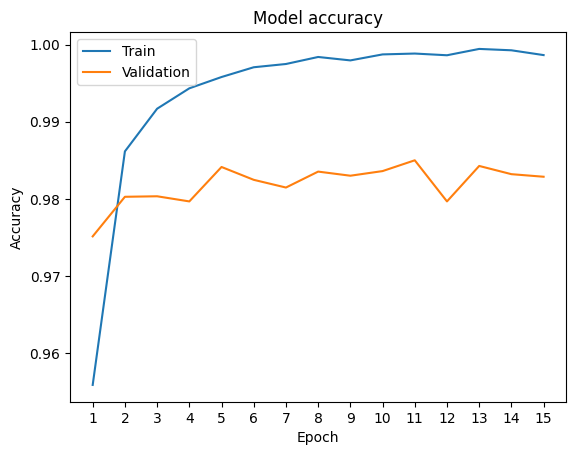

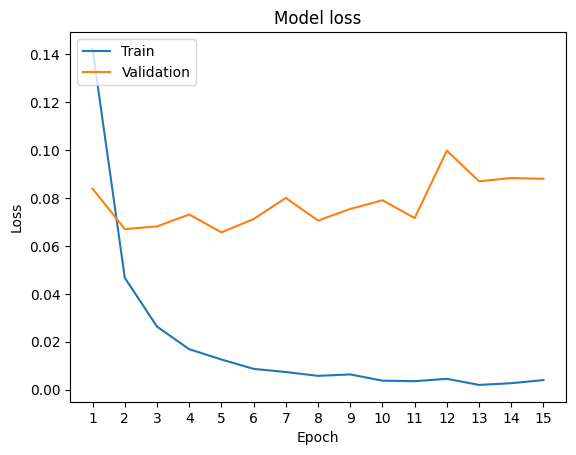

313/313 [==============================] - 1s 3ms/step


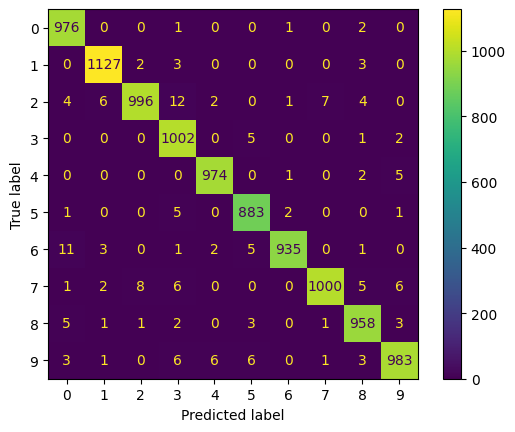

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Hyper parameters
learning_rate   = 0.001
epochs          = 15

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')


print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

# Creating a Sequential Model and adding layers
inputs = tf.keras.layers.Input(input_shape)

# Normalizing the pixel values by dividing by the max value
s = tf.keras.layers.Lambda(lambda x: x/255)(inputs)

conv1 = tf.keras.layers.Conv2D(28, (3,3), name='conv_layer', activation=tf.keras.activations.relu, kernel_initializer='he_normal', padding='same')(s)
pool1 = tf.keras.layers.MaxPooling2D((2,2))(conv1)
flatten = tf.keras.layers.Flatten()(pool1)
dense1 = tf.keras.layers.Dense(128, name='feature_layer', activation=tf.keras.activations.relu)(flatten)
outputs = tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)(dense1)
model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
model.save('Models/model00.h5')

cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath='Models/model{epoch:02d}.h5', monitor='val_loss', save_weights_only=False, save_freq='epoch', verbose=1)
callbacks = [cp_callback]

# compile and start learning the model
model.compile(optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=learning_rate), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()
history = model.fit(x=x_train,y=y_train, batch_size=32, epochs=epochs, validation_split=0.25, verbose=1,callbacks=callbacks)

# Visualise the model
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True)

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.xticks(np.arange(epochs), np.arange(1, epochs+1))
plt.savefig('Model-Accuracy.png')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.xticks(np.arange(epochs), np.arange(1, epochs+1))
plt.savefig('Model-Loss.png')
plt.show()

# Evaluate the test set
#model.evaluate(x_test, y_test)
y_pred = np.argmax(model.predict(x_test),axis=1)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

<H2> Wie kann man das Lernen des neuronalen Netzes veranschaulichen?</H2>

In [1]:
%matplotlib widget 
import numpy as np
import time
import tensorflow as tf
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from ipywidgets import interactive, fixed

# number of epochs
num_epochs = 15

# number of samples per class
num_samples = 100

# load sample data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# draw 20 samples for each class
indices_0 = np.random.choice(np.where(y_train == 0)[0],num_samples)
indices_1 = np.random.choice(np.where(y_train == 1)[0],num_samples)
indices_2 = np.random.choice(np.where(y_train == 2)[0],num_samples)
indices_3 = np.random.choice(np.where(y_train == 3)[0],num_samples)
indices_4 = np.random.choice(np.where(y_train == 4)[0],num_samples)
indices_5 = np.random.choice(np.where(y_train == 5)[0],num_samples)
indices_6 = np.random.choice(np.where(y_train == 6)[0],num_samples)
indices_7 = np.random.choice(np.where(y_train == 7)[0],num_samples)
indices_8 = np.random.choice(np.where(y_train == 8)[0],num_samples)
indices_9 = np.random.choice(np.where(y_train == 9)[0],num_samples)

color_list = ['red','blue','green','yellow','darkviolet','dodgerblue','darkorange','darkgrey','cyan','peru']
reduced_results = np.zeros((num_epochs+1, num_samples*10, 2))

# loop over all previously stored models (reflecting model state after several epochs)
for i in range(0,num_epochs+1):
    filename = "Models/model%02d.h5" % i
    model = tf.keras.models.load_model(filename)
    
    # create new model with missing output layer
    intermediate_layer_model = tf.keras.Model(inputs=model.input,outputs=model.get_layer('feature_layer').output)
    
    # calculate feature vectors (consisting of values of neurons in the now last layer)
    result = intermediate_layer_model(x_train[indices_0])
    result = np.concatenate((result, intermediate_layer_model(x_train[indices_1])))
    result = np.concatenate((result, intermediate_layer_model(x_train[indices_2])))
    result = np.concatenate((result, intermediate_layer_model(x_train[indices_3])))
    result = np.concatenate((result, intermediate_layer_model(x_train[indices_4])))
    result = np.concatenate((result, intermediate_layer_model(x_train[indices_5])))
    result = np.concatenate((result, intermediate_layer_model(x_train[indices_6])))
    result = np.concatenate((result, intermediate_layer_model(x_train[indices_7])))
    result = np.concatenate((result, intermediate_layer_model(x_train[indices_8])))
    result = np.concatenate((result, intermediate_layer_model(x_train[indices_9])))
    
    reduced_results[i,:,:] = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=15).fit_transform(result)
    
    # in order to have comparable views we have to choose a constant orientation and location
    dx = -reduced_results[i,0,0]
    dy = -reduced_results[i,0,1]
    
    # angle
    phi = np.arctan2(reduced_results[i,1,1]-reduced_results[i,0,1], reduced_results[i,1,0]-reduced_results[i,0,0])
    
    # perform transformation
    for j in range(reduced_results.shape[1]):
        x_new = (reduced_results[i,j,0]+dx)*np.cos(-phi)-np.sin(-phi)*(reduced_results[i,j,1]+dy)
        y_new = (reduced_results[i,j,0]+dx)*np.sin(-phi)+np.cos(-phi)*(reduced_results[i,j,1]+dy)
        
        reduced_results[i,j,0] = x_new
        reduced_results[i,j,1] = y_new
    
    

def show_features(epoch=0):

    plt.rcParams["figure.figsize"] = [10, 10]
    plt.rcParams["figure.autolayout"] = True

    fig = plt.figure()
    ax = fig.add_subplot()
    
    ax.scatter(reduced_results[epoch,0:num_samples,0], reduced_results[epoch,0:num_samples,1], color=color_list[0])    
    ax.scatter(reduced_results[epoch,num_samples:2*num_samples,0], reduced_results[epoch,num_samples:2*num_samples,1], color=color_list[1])        
    ax.scatter(reduced_results[epoch,2*num_samples:3*num_samples,0], reduced_results[epoch,2*num_samples:3*num_samples,1], color=color_list[2])    
    ax.scatter(reduced_results[epoch,3*num_samples:4*num_samples,0], reduced_results[epoch,3*num_samples:4*num_samples,1], color=color_list[3])    
    ax.scatter(reduced_results[epoch,4*num_samples:5*num_samples,0], reduced_results[epoch,4*num_samples:5*num_samples,1], color=color_list[4])    
    ax.scatter(reduced_results[epoch,5*num_samples:6*num_samples,0], reduced_results[epoch,5*num_samples:6*num_samples,1], color=color_list[5])
    ax.scatter(reduced_results[epoch,6*num_samples:7*num_samples,0], reduced_results[epoch,6*num_samples:7*num_samples,1], color=color_list[6])    
    ax.scatter(reduced_results[epoch,7*num_samples:8*num_samples,0], reduced_results[epoch,7*num_samples:8*num_samples,1], color=color_list[7])    
    ax.scatter(reduced_results[epoch,8*num_samples:9*num_samples,0], reduced_results[epoch,8*num_samples:9*num_samples,1], color=color_list[8])
    ax.scatter(reduced_results[epoch,9*num_samples:10*num_samples,0], reduced_results[epoch,9*num_samples:10*num_samples,1], color=color_list[9])   
    #ax.autoscale_view()
    ax.set_xlim(-150,150)
    ax.set_ylim(-150,150)

    plt.show()
    
# perform actual code
v=interactive(show_features,epoch=(0,num_epochs,1))
v

interactive(children=(IntSlider(value=0, description='epoch', max=15), Output()), _dom_classes=('widget-intera…

<a id="s3"></a><h3 style="color:rgb(127,203,223)">6.3 Bild-Segmentierung mit dem U-Net</h3>

Wie bereits in <a href="Chapter01.ipynb#s6">Kapitel 1</a> vorgestellt, geht es bei der Segmentierung von Bildern vereinfacht gesagt darum, eine Klassenzugehörigkeit für jedes einzelne Pixel zu bestimmen. Dies kann wiederum binär erfolgen, es kann also entschieden werden, ob das Pixel zum ausgewählten Objekt oder stattdessen zum Hintergund gehört. Ebenso möglich ist aber natürlich auch eine Multiklassen-Segmentierung, bei der jedes Pixel einer von mehr als zwei Klassen angehören kann. Die in Kapitel 1 präsentierten Bilder, die die binäre Segmentierung der Wirbelkörper zeigen, sind mit dem folgenden neuronalen Netz, welches als <b>U-Net</b> bezeichnet wird, erstellt worden. Das <a href="https://lmb.informatik.uni-freiburg.de/people/ronneber/u-net/">U-Net</a> geht auf <i>O. Ronneberger et al.</i> zurück. Das hier verwendete U-Net ist in der folgenden Abbildung dargestellt.<br><br>

<p style="text-align: center"><img src="pics/U-Net.png" alt="Bild" style="height: 800px; width: 1200px;"><br>Fertiges Modell</p><br>

Die Namensgebung ist durch die Form des Netzes movitiert worden. Es handelt sich, siehe auch <a href="Chapter05.ipynb#s8">Kapitel 5</a>, um eine Form von <b>Autoencoder</b>. Der linke Teil des U's entspricht dem <b>Encoder</b> und der rechte Teil des U's dem <b>Decoder</b>. Anders als beim Beispiel in Kapitel 5 soll der Output des Netzes jedoch nicht mit dem Input übereinstimmen sondern stattdessen eine binäre Version des Inputs darstellen, bei dem alle Teile von Wirbelkörpern weiss und alles andere schwarz dargestellt wird. Eine ausführliche Besprechung des Aufbaus sowie der Wirkweise des Netzes wird im Rahmen der Vorlesung durchgeführt. 

<a id="s4"></a><h3 style="color:rgb(127,203,223)">6.4 ChatGPT - Ein Game Changer?</h3>

Da der Chatbot ChatGPT eine besondere Aufmerksamkeit erlangt hat, sollen hier einige Grundlagen kurz angesprochen werden. Bei ChatGPT handelt es sich um eine Softwareanwendung, die eine menschliche Kommunikation nachahmt. Entwickelt wurde es von <I>OpenAI</I>, gegründet 2015, und finanziert wird es u.a. von Elon Musk und Microsoft.<P>
    ChatGPT basiert auf dem <I>Generative Pre-Trained Transformer 3.5</I>. Für ein grundlegendes Verständnis ist daher die Funktionsweise des <I>Transformers</I> essentiell. <I>Transformer</I> stellen vereinfach gesagt eine Kombination aus <I>Convolutional Neural Networks (CNN)</I> und so genannten <I>Attention-Modulen</I> dar. Dies ermöglicht unter anderem eine parallele Verarbeitung von Eingaben und berücksichtigt die Bedeutung einzelner Wörter im Kontext ganzer Sätze für die Analyse (bspw. Übersetzung in andere Sprachen). Der grundsätzliche Aufbau eines <I>Transformers</I> wird bspw. in den folgenden Beiträgen erläutert:<P>
    <UL>
    <LI><a href="https://towardsdatascience.com/transformers-141e32e69591">How Transformers work</A></LI>
    <LI><a href="http://jalammar.github.io/illustrated-transformer/">The Illustrated Transformer</a></LI>
    </UL>
    Das Training des ChatGPT erfolgt in mehreren Schritten:<P>
    <UL>
        <LI>Selbstüberwachtes Lernen (self-supervised learning)</LI>
        <LI>Fine-Tuning durch überwachtes Lernen</LI>
        <LI>Reinforcement Learning (ein Reward-Modell bewertet hierbei die Antworten von ChatGPT)</LI>
    </UL>

Da die Idee des selbstüberwachten Lernens auch für Anwendungen im Bereich der Computer Vision relevant ist, soll dies noch ein wenig näher betrachtet werden. <B>Yann LeCun</B> definiert diese Form des Lernens wie folgt:<P>
    <CENTER><I>Self-supervised learning is one of the most promising ways to build background knowledge and approximate a form of common sense in AI systems.</I></CENTER><BR>
Die Idee hierbei, teilweise auch geboren aus der Not, dass eine hinreichend große Zahl von annotierten Daten, wie sie zum überwachten Training notwendig wären, gar nicht zur Verfügung stehen, besteht darin, mit so genannten <I>pseudo-labels</I> zu arbeiten. Diese können automatisiert aus den Daten (Bilder, Text) generiert werden und dienen dann als Referenz für ein überwachtes Lernen. Auf diesem Wege entsteht dann ein Modell, welches zwar noch nicht die ursprüngliche Frage beantworten kann, das jedoch als Grundlage für ein erweitertes Modell zur Lösung des ursprüngliche Problems herangezogen werden kann. Für dieses sind jetzt jedoch sehr viel weniger annotierte Daten erforderlich, da das Model im Rahmen des selbstüberwachten Lernens bereits eine Repräsentation der zur klassifizierenden Objekte erlernt hat. Die (teilweise) Wiederverwendung von bereits vorhandenen Modellen wird unter dem Begriff des <B>Transfer Learning</B> zusammengefasst. Häufig wird hierbei lediglich der Teil des Modells ersetzt, der die finale Klassifikation vornimmt, während der größere Anteil, der für die Erzeugung von für die Klassifikation geeigneten Merkmalsvektoren verantwortlich ist, weitestgehend beibehalten wird. Anbei noch Link zu einer ausführlicheren Beschreibung sowie ein YouTube-Video, in welchem Yann LeCun dieses Lernverfahren thematisiert:<P>
    <A href="https://ai.meta.com/blog/self-supervised-learning-the-dark-matter-of-intelligence/">Self-Supervised Learning in Computer Vision</A><BR>
    <A href="https://www.youtube.com/watch?v=7I0Qt7GALVk&t=2639s">Self-supervised learning: could machines learn like humans?</A><P>
ChatGPT besitzt darüber hinaus auch zusätzliche Mechanismen der "Zensur", um unangebrachte Ausgaben bzw. Anfragen zu unterdrücken.<P>    
<B>Das Training von ChatGPT verbraucht (Quelle: Wikipedia) in 34 Tagen ca. 1GWh an elektrischer Leistung. Dies entspricht in etwa dem Jahresverbrauch von 200 3-Personenhaushalten!<B>    

<a id="s5"></a><h3 style="color:rgb(127,203,223)">6.5 PINNs - Eine erste Einführung</h3>

Der von  <a href="https://www.sciencedirect.com/science/article/abs/pii/S0021999118307125">Raissi et al.</a> eingeführte Begriff <strong>„Physics-informed neural networks“</strong> bezieht sich auf die Verwendung neuronaler Netze, in der Regel eine Form von Multilayer Perceptron (MLP), zur Lösung gewöhnlicher oder partieller Differentialgleichungen. Der Bezug zur Physik ergibt sich vermutlich aus den diskutierten Beispielen, die zumeist aus dem Bereich der Physik stammen, obwohl die Methode selbst keineswegs auf physikalische Probleme beschränkt ist, wie wir noch sehen werden. Neuronale Netze im Allgemeinen und das mehrschichtige Perzeptron im Besonderen werden zur funktionalen Approximation von Lösungen von (partiellen) Differentialgleichungen (P)DEs verwendet. Die Verwendung neuronaler Netze zur Lösung partieller Differentialgleichungen reicht bis in die 90er Jahre des letzten Jahrhunderts zurück. Ausgehend von der Idee der Hopfield-Netze wurden die ersten Methoden zur Verwendung neuronaler Netze zur Lösung von (P)DEs entwickelt. Die (P)DEs selbst wurden dabei bereits in einer Art Verlustfunktion, hier noch als Energiefunktionale bezeichnet, berücksichtigt, die es zu minimieren galt (<a href="https://arxiv.org/abs/2211.05567">link1</a>,<a href="https://www.google.de/url?sa=t&source=web&rct=j&opi=89978449&url=https://www.sciencedirect.com/science/article/pii/002199919090007N/pdf%3Fmd5%3D1ad3b41e797414d2a0b579d08700d872%26pid%3D1-s2.0-002199919090007N-main.pdf&ved=2ahUKEwjEnuyb3dOGAxXKh_0HHdvFBuIQFnoECBUQAQ&usg=AOvVaw03ChYHFj3pUIq58WmaQJor">link2</a>). Nach fast zwei Jahrzehnten, in denen laut unten stehender Abbildung keine nennenswerten Weiterentwicklungen stattgefunden haben, hat der Einsatz von neuronalen Netzen zur Lösung von (P)DEs seit 2017 wieder deutlich an Bedeutung und an Aufmerksamkeit gewonnen. Dies liegt vermutlich auch daran, dass leistungsfähige Frameworks wie <a href="https://www.tensorflow.org/">Tensorflow</a> oder <a href="https://pytorch.org/">PyTorch</a> und leistungsfähige GPUs erst seit etwa 2015 verfügbar sind. Doch warum sind neuronale Netze besonders geeignete Funktionsapproximatoren für die Lösung von (P)DEs?<P>
Auch diese Frage wurde bereits Ende der 1990er Jahre diskutiert <a href="https://www.sciencedirect.com/science/article/abs/pii/0893608089900208">link</a>.<P>
<p style="text-align: center"><img src="pics/milestones.png" alt="Bild" style="height: 600px; width: 1000px;"><br>Quelle: "Partial differential equations meet deep neural networks: A survey". ArXiv, abs/2211.05567, 2022.</p><br>
Die mathematische Begründung für die Verwendung von MLPs als Approximatoren zur Lösung von (P)DEs besteht in der Tatsache, dass stetige Funktionen mit beliebiger Genauigkeit durch ein mehrschichtiges Perzeptron approximiert werden können. Genauer gesagt, mit:
$$\mathcal{M}(\sigma) := span\left\{\sigma(<\underline{w}|\underline{x}>-\Theta) \,| \, \Theta \in \mathbb{R}, \, \underline{w}\in \mathbb{R}^n\right \}$$
gilt das folgende Theorem (<a href="https://www.cambridge.org/core/journals/acta-numerica/article/abs/approximation-theory-of-the-mlp-model-in-neural-networks/18072C558C8410C4F92A82BCC8FC8CF9">"Approximation theory of the MLP model in neural networks"</a>):<P><HR>
<CENTER>Sei $\sigma \in \mathcal{C}(\mathbb{R})$, dann liegt $\mathcal{M}(\sigma)$ dicht in $\mathcal{C}(\mathbb{R}^n)$ in Bezug auf die Topologie der gleichmässigen Konvergenz auf Kompakta, genau dann, wenn $\sigma$ kein Polynom ist. </CENTER><P><HR>
Das bedeutet, dass für jedes geeignete $\sigma$ gilt:<P>
<CENTER>Für jedes $f \in \mathcal{C}(\mathbb{R^n})$ und jede kompakte Menge $K$ sowie $\epsilon > 0$ existiert ein $g \in \mathcal{M}(\sigma)$, so dass gilt: $\max\limits_{\underline{x}\in K} |f(\underline{x})-g(\underline{x})|< \epsilon$</CENTER><P>
<strong>Das bedeutet konkret, dass sich jede stetige Funktion beliebig genau durch ein MLP annähern lässt !!!</strong><P>
$\sigma$ ist gerade das, was in der Terminologie der neuronalen Netze auch als Aktivierungsfunktion bekannt ist. Dabei handelt es sich in der Regel ja um eine nicht-polynomiale Funktion. MLPs sind bekanntlich differenzierbar in Bezug auf ihre Gewichte $\underline{w}$ und Biases $\Theta$. Dies wird ja gerade beim überwachten Lernen in Form von Backpropagation genutzt. Die Ausgabe des MLP wird mit Hilfe einer Verlustfunktion mit der Zielausgabe verglichen, und letztere wird dann in Bezug auf die Freiheitsgrade des MLP (Gewichte und Biases) differenziert. Die Differentiation kann aber nicht nur nach den internen Freiheitsgraden erfolgen, sondern, wie wir auch bereits gesehen haben, auch in Bezug auf die Eingabewerte bzw. Neuronen. Dies kann sogar bis zu einer beliebigen Ordnung geschehen. Auf diese Weise kann ein entsprechend konfiguriertes MLP in eine gegebene (P)DE eingefügt und die Abweichung von Null mittels einer Verlustfunktion interpretiert werden. Auf diese Weise kann das Netz so trainiert werden, dass es ein gegebenes (P)DE näherungsweise löst. Dies soll nun zunächst schematisch (entnommen aus <a href="https://www.researchgate.net/publication/351814752_Physics-informed_machine_learning">Quelle</a>) und später anhand konkreter Beispiele illustriert werden.<P>
ben ist die Burgers'sche Gleichung:<P>
$$\frac{\partial u}{\partial t}+u \, \frac{\partial u}{\partial x} = \nu \, \frac{\partial^2 u}{\partial x^2}$$
mit einer geeigneten Anfangsbedingung und Dirichlet-Randbedingungen. $\nu$ ist eine gegebene Konstante. Die nächste Abbildung zeigt die Darstellung mittels MLP.<P><P>
<p style="text-align: center"><img src="pics/pinn.png" alt="Bild" style="height: 600px; width: 1000px;"><br><a href="https://www.researchgate.net/publication/351814752_Physics-informed_machine_learning">Quelle<a></p><br>
Die Loss-Funktion ist hierbei wie folgt definiert:<P>
<p style="text-align: center"><img src="pics/Loss-Function-PINN.png" alt="Bild" style="height: 400px; width: 800px;"><P>
Sie besteht aus einzelnen Verlustfunktionen, die jeweils die Abweichungen zwischen der Approximation mittels MLP und den vorgegebenen Werten zum Anfangszeitpunkt oder am Rand quantifizieren. Darüber hinaus werden Fehler in der Erfüllung der Burgers'schen Gleichung selbst berücksichtigt, indem beliebige Werte aus der gesamten Domain gezogen werden. Der Einfluss der verschiedenen Verlustfunktionen kann durch Gewichte berücksichtigt werden. Bis zu diesem Punkt sind PINNs lediglich eine andere Form der numerischen Lösung von (P)DEs. Ihre Besonderheit und insbesondere ihr Alleinstellungsmerkmal gegenüber anderen etablierten Verfahren, wie der Finite-Differenzen-Methode (FDM) oder der Finite-Elemente-Methode (FEM), besteht darin, dass analog zu den Anfangs- und Randwerten auch andere Werte aus dem gesamten Gebiet in Form einer zusätzlichen Verlustfunktion berücksichtigt werden können. Dies eröffnet die Möglichkeit, Messwerte direkt in den numerischen Lösungsprozess einfließen zu lassen. Darin liegt nach Ansicht dieses Autors der tiefere Grund für den Begriff „physics informed“, weil auf diese Weise das theoretische Modell direkt mit dem Experiment gekoppelt werden kann. Eine Reihe von anschaulichen und beeindruckenden Beispielen finden Sie in (<a href="https://www.researchgate.net/publication/351814752_Physics-informed_machine_learning">Beispiel1</a>, <a href="https://www.sciencedirect.com/science/article/abs/pii/S0021999118307125">Beispiel2</a>, <a href="https://arxiv.org/abs/1711.10561">Beispiel3</a>, <a href="https://arxiv.org/abs/1711.10566">Beispiel4</a>). Diese einzigartige Eigenschaft von PINNs kann auch anhand der folgenden Abbildung veranschaulicht werden. PINNs nehmen eine Art Mittelstellung zwischen Problemen ein, bei denen üblicherweise maschinelles Lernen eingesetzt wird, und solchen, die theoretisch behandelt werden können. Liegt eine umfassende Theorie vor, z.B. in Form einer (partiellen) Differentialgleichung, und sind Anfangs- und Randbedingungen gegeben, können etablierte numerische Methoden eingesetzt werden. Dies entspricht der linken Seite der Abbildung. Probleme, für die es keine Theorie, aber eine große Menge an Daten gibt, sind prädestiniert für die Anwendung von Methoden des maschinellen Lernens wie neuronalen Netzen. Ein typisches Beispiel hierfür war in der Vergangenheit die Entwicklung von Systemen zur Erkennung von Gesichtern in natürlichen Bildern. Diese Probleme befinden sich im rechten Teil der Abbildung. Aber auch Probleme, für die zwar eine theoretische Beschreibung, z.B. in Form von (partiellen) Differentialgleichungen, vorliegt, deren Parameter oder gar Funktionen aber noch nicht bekannt sind, können hier im Zentrum stehen, sofern Messwerte/Beispieldaten vorhanden sind. Mit einem PINN können wir dann die (partielle) Differentialgleichung lösen und parallel die unbekannten Parameter oder Funktionen bestimmen. PINNs bieten somit die Möglichkeit, Theorie und Daten in einem gemeinsamen Modell zu berücksichtigen.
<p style="text-align: center"><img src="pics/NNversusSimulation.png" alt="Bild" style="height: 400px; width: 800px;"><br><a href="https://www.researchgate.net/publication/351814752_Physics-informed_machine_learning">Quelle<a></p><br><P>
Nach <a href="https://www.researchgate.net/publication/351814752_Physics-informed_machine_learning">Quelle</a> kann das theoretische Wissen auf drei verschiedene Arten berücksichtigt werden. Die erste ist der so genannte <strong>Observational Bias</strong>. Hier werden physikalische Korrelationen implizit über die zum Training verwendeten Daten in den Lernprozess eingebracht. Symmetrien des zugrunde liegenden Problems spiegeln sich unweigerlich in den Daten wider. Der zweite Weg ist das, was sie als <strong>Inductive Bias</strong> bezeichnen. Hier werden physikalische Beziehungen und Zwänge direkt in die Struktur des neuronalen Netzes implementiert. Diese Form ist die strengste, aber auch die am schwierigsten zu realisierende.Ein Beispiel hierfür findet sich etwa in <a href="https://arxiv.org/abs/1909.00912">Quelle</a>. Eine Analogie im Bereich des maschinellen Lernens ist z.B. die Realisierung von so genannten Faltungsnetzen, die von ihrer Architektur her translationsinvariant ausgelegt sind. Die dritte und letzte Methode bezeichnen die Autoren mit dem Begriff <strong>Learning Bias</strong>. Hier wird, wie bereits oben am Beispiel gezeigt, die Physik in Form von Verlustfunktionen in den Trainingsprozess eingebracht. Auf diese Weise kann eine Vielzahl von Problemen adressiert werden. Diese auch als soft penalty constraints bezeichneten Bedingungen können jedoch nur näherungsweise erfüllt werden. Die generelle Idee des „learning bias“ wurde, wie bereits erwähnt, schon in den späten 1980er Jahren vorgeschlagen.<P>
<p style="text-align: center"><img src="pics/theoryNN.png" alt="Bild" style="height: 500px; width: 600px;"><br><a href="https://www.researchgate.net/publication/351814752_Physics-informed_machine_learning">Quelle<a></p><br><P>



<a id="s6"></a><h4 style="color:rgb(127,203,223)">6.5.1 Ein Randwertproblem - PINN</h4>

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 25)                50        
                                                                 
 dense_2 (Dense)             (None, 25)                650       
                                                                 
 dense_3 (Dense)             (None, 25)                650       
                                                                 
 dense_4 (Dense)             (None, 1)                 25        
                                                                 
Total params: 1375 (10.74 KB)
Trainable params: 1375 (10.74 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch: 0	 MSE Loss = 2.1833856097507685
Epoch: 1000	 MSE Loss = 0.12561020966464614
Epoch: 2000	 MSE Loss = 0.001327690495024978
Epoch: 3000	 MSE Loss = 0

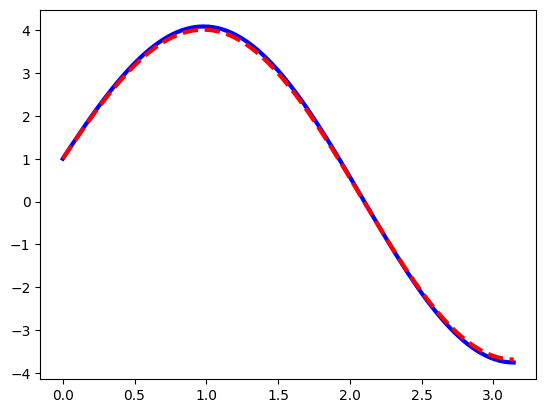

In [3]:
import numpy as np
import tensorflow as tf
#import tensorflow_probability as tfp
import matplotlib.pyplot as plt

######################################################################################################
# Using PINN for solving boundary value problem using the following example                          #
#                                                                                                    #
#           d^2w_dx^2 + 2 w(x) = cos(x)^2 with w(0)=1 and w'(pi)=0                                   #
#                                                                                                    #
#           Symbolic Solution: w(x) = 0.5 sin(x)^2 +cos(sqrt(2) x) + tan(sqrt(2) pi) sin(sqrt(2) x)  #                                    
#                                                                                                    #
######################################################################################################
tf.keras.backend.set_floatx('float64')

def generate_samples_domain(num_domain=10, lower_bound=0.0, upper_bound=3.1415926):
    domain_samples = tf.random_uniform_initializer(minval=lower_bound, maxval=upper_bound, seed=0)
    
    return tf.Variable(tf.cast(domain_samples(shape=[num_domain,1]),tf.float64))

def diff2(tape, w, x):
    dw_dx   = tape.gradient(w,x)
    d2w_dx2 = tape.gradient(dw_dx,x) 

    return d2w_dx2

def diff(tape, w, x):
    dw_dx = tape.gradient(w,x)

    return dw_dx

def bvp(tape, w, x):
    bvp = diff2(tape,w,x)+2.0*w-tf.square(tf.cos(x))

    return bvp

def create_model():
    num_inputs  = 1
    num_outputs = 1
    activation  = 'tanh'

    model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(num_inputs,),dtype=tf.float64),
    tf.keras.layers.Dense(units=25,activation='tanh',dtype=tf.float64),
    tf.keras.layers.Dense(units=25,activation='tanh',dtype=tf.float64),
    tf.keras.layers.Dense(units=25,activation='tanh',dtype=tf.float64),        
    tf.keras.layers.Dense(units=num_outputs,activation='linear', use_bias=False,dtype=tf.float64)
    ])

    return model

epochs = 6000
lr     = 0.0005

model = create_model()
model.summary()

initial_learning_rate = 0.001
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate,decay_steps=2000,decay_rate=0.8,staircase=True)
optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=lr_schedule)

x = generate_samples_domain(num_domain=40)
bcl = 1.0
bcr = 0.0

x_bcl = tf.constant(tf.cast(0.0,tf.float64), shape=[1,1])
x_bcr = tf.constant(tf.cast(3.1415926, tf.float64),shape=[1,1])


for i in range(epochs+1):
    with tf.GradientTape(persistent=True) as tape_model:
        with tf.GradientTape(persistent=True) as tape_de:
            tape_de.watch(x)
            tape_de.watch(x_bcr)
            tape_de.watch(x_bcl)
            w            = model(x,training=True)            
            dw2_dx2      = diff2(tape_de, w, x)
            w_bcl        = model(x_bcl,training=True)
            dw_dx_bcr    = diff(tape_de,model(x_bcr, training=True),x_bcr)
            
            bcl_error    = w_bcl - bcl
            bcr_error    = dw_dx_bcr - bcr
            domain_error = bvp(tape_de, w, x) 

        domain_mse  = tf.math.reduce_mean(tf.math.square(domain_error), axis=0)
        bcl_mse     = tf.reduce_mean(tf.math.square(bcl_error), axis=0)
        bcr_mse     = tf.reduce_mean(tf.math.square(bcr_error), axis=0)
        
        total_mse  = domain_mse + bcl_mse + bcr_mse

        if i % 1000 == 0:
            print('Epoch: {}\t MSE Loss = {}'.format(i, total_mse.numpy()[0]))

    model_update_gradients = tape_model.gradient(total_mse, model.trainable_variables)
    optimizer.apply_gradients(zip(model_update_gradients, model.trainable_variables))


x = np.linspace(0.0, np.pi, 100)
res = model.predict(x)
plt.figure()
plt.plot(x, np.sin(x)**2/2.0+np.cos(np.sqrt(2)*x)+np.tan(np.sqrt(2)*np.pi)*np.sin(np.sqrt(2)*x),linewidth=3,c='blue')
plt.plot(x, res, linestyle='--', linewidth=3, c='red')
plt.show()

<a id="s7"></a><h4 style="color:rgb(127,203,223)">6.5.2 Eine Integro-Differentialgleichung - PINN</h4>

In [ ]:
import numpy as np
import tensorflow as tf
#import tensorflow_probability as tfp
import matplotlib.pyplot as plt

###########################################################################################
# Using PINN for solving integro-differential equation using the following example        #
#                                                                                         #
#           du_dt + 2 u(t) + 5 int_0^t u(x) dx = 1 for t>0 and u(0) = 0                   #
#                                                                                         #
#           Symbolic Solution: u(t) = 0.5 exp(-t) sin(2t)                                 #
#                                                                                         #
###########################################################################################
tf.keras.backend.set_floatx('float64')
initial_value = 0

def generate_samples_domain(num_domain=10, lower_bound=0.0, upper_bound=2.0):
    domain_samples = tf.random_uniform_initializer(minval=lower_bound, maxval=upper_bound, seed=0)
    
    return tf.Variable(tf.cast(domain_samples(shape=[num_domain,1]),tf.float64))

def diff(tape, u, t):
    return tf.reshape(tape.gradient(u,t), [t.shape[0],1])

def integral(x, u_int):
    int_u = tfp.math.trapz(tf.transpose(u_int), tf.transpose(x))
    int_u = tf.reshape(int_u, [u_int.shape[1],1])
    return int_u

def de(tape, u, t, x, u_int):
    return (diff(tape,u,t)+2.0*u+5.0*integral(x, u_int)-1.0)

def ic(t):
    return 0.0

def create_model():
    num_inputs  = 1
    num_outputs = 1
    activation  = 'tanh'

    model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(num_inputs,),dtype=tf.float64),
    tf.keras.layers.Dense(units=16,activation='tanh',dtype=tf.float64),
    tf.keras.layers.Dense(units=16,activation='tanh',dtype=tf.float64),
    tf.keras.layers.Dense(units=16,activation='tanh',dtype=tf.float64),        
    tf.keras.layers.Dense(units=num_outputs,activation='linear', use_bias=False,dtype=tf.float64)
    ])

    return model


epochs = 20000
lr     = 0.0005
num_support_points = 16

model = create_model()
model.summary()

initial_learning_rate = 0.01
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate,decay_steps=2000,decay_rate=0.8,staircase=True)
optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=lr_schedule)

# data being used for training
t = generate_samples_domain(num_domain=40)
x = tf.reshape(tf.linspace(initial_value*tf.ones_like(t),t,num_support_points),[num_support_points, t.shape[0]])
t_ic = tf.constant(0.0, shape=[1,1])

for i in range(epochs+1):
    with tf.GradientTape(persistent=True) as tape_model:
        with tf.GradientTape(persistent=True) as tape_de:
            tape_de.watch(t)
            tape_de.watch(t_ic)
            tape_de.watch(x)
            u            = model(t,training=True)
            u_int        = model(tf.reshape(x,num_support_points*t.shape[0]),training=True)
            u_int        = tf.reshape(u_int, [num_support_points, t.shape[0]])
            ic_error     = model(t_ic,training=True)[0][0] - ic(t_ic)
            domain_error = de(tape_de, u, t, x, u_int) 

        domain_mse = tf.math.reduce_mean(tf.math.square(domain_error), axis=0)
        ic_mse     = tf.math.square(ic_error)
        total_mse  = domain_mse + ic_mse

        if i % 1000 == 0:
            print('Epoch: {}\t MSE Loss = {}'.format(i, total_mse.numpy()[0]))

    model_update_gradients = tape_model.gradient(total_mse, model.trainable_variables)
    optimizer.apply_gradients(zip(model_update_gradients, model.trainable_variables))


t = np.linspace(0.0, 2.0, 100)
res = model.predict(t)
plt.figure()
plt.plot(t, 0.5* np.exp(-t) * np.sin(2.0*t),linewidth=3,c='blue')
plt.plot(t, res, linestyle='--',linewidth=3,c='red')
plt.show()

<a id="s8"></a><h4 style="color:rgb(127,203,223)">6.5.3 Some more sophisticated examples - PINN</h4>

<h5 style="color:rgb(127,203,223)">Navier Stokes Equation 6.5.3.1 (taken from <a href="https://arxiv.org/abs/1711.10566">Quelle</a>)</h5>
<p style="text-align: center"><img src="pics/NavierStokes-Equations.png" alt="Bild" style="height: 100px; width: 400px;"><br><br><br><br>
<p style="text-align: center"><img src="pics/NavierStokes_data.png" alt="Bild" style="height: 700px; width: 800px;"><P><br><br><br><br>
<p style="text-align: center"><img src="pics/NavierStokes_prediction.png" alt="Bild" style="height: 700px; width: 900px;"><P>
<HR>
<h5 style="color:rgb(127,203,223)">Espresso Cup 6.5.3.2 (taken from <a href="https://www.researchgate.net/publication/351814752_Physics-informed_machine_learning">Quelle</a>)</h5>
<p style="text-align: center"><img src="pics/EspressoCup.png" alt="Bild" style="height: 1000px; width: 1000px;"><br><br><br><br>

<a id="s9"></a><h3 style="color:rgb(127,203,223)">6.6 Ausblick</h3>

In diesem Kapitel erfolgte eine sehr kurze Einführung in den stetig größer werdenden Komplex des Deep Learning. Anhand eines einfachen Beispiels, welches aufgrund der kleinen Anzahl an Schichten streng genommen gar nicht zu den tiefen neuronalen Netzen gezählt werden kann, wurden einige grundsätzliche Elemente der <i>Convolutional Neural Networks</i> erläutert. Ein <i>tieferes</i> neuronales Netz, das U-Net, wurde dann im Anschluss diskutiert.<br>
Tatsächlich ist der Themenbereich des Deep Learning sehr viel umfangreicher und umfasst neben den reinen Feed-Forward-Netzen (die Information fließt während der Berechnung ausschließlich von der Eingabe- zur Ausgabeschicht) insbesondere auch die so genannten rekurrenten Netze, die anders als die Feed-Forward-Netze auch einen Informationsfluss von einer Schicht zur selben oder einer Vorgängerschicht erlauben. Auf diesem Wege ist es insbesondere möglich, Sequenzen zu verarbeiten, weswegen solche Netze bspw. bei der Spracherkennung eine besondere Bedeutung besitzen. In diesem Zusammenhang kann bspw. auf die <a href="https://towardsdatascience.com/lstm-networks-a-detailed-explanation-8fae6aefc7f9"><b>Long Short Term Memory</b></a> verwiesen werden. Auch die Anwendung von tiefen neuronalen Netzen im Kontext des <a href="https://wiki.pathmind.com/deep-reinforcement-learning"><b>Reinforcement Learning</b></a> soll hervorgehoben werden. Für weitere Beispiele verweise ich hier nochmal auf das bereits erwähnte Buch "Deep Learning" von Goodfellow et al.

<a id="s10"></a><h3 style="color:rgb(127,203,223)">6.7 Benefits and Risks of AI</h3>

In [ ]:
from IPython.display import IFrame
IFrame(src='keynote/Benefits_and_Risks_of_AI.pdf', width='1400', height='1000')

<H1>Just for keynote demonstration</H1>

<H2>Create samples from modified random variables</H2>

<Axes: ylabel='Density'>

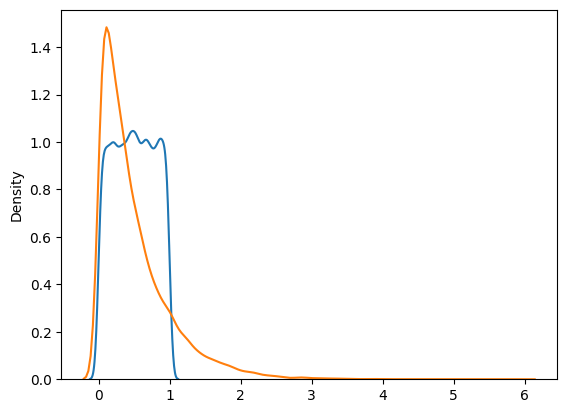

In [1]:
import numpy as np
from seaborn import kdeplot

l=2
rv1 = np.random.uniform(low=0.0, high=1.0, size=20000)
kdeplot(rv1)
rv2=-1/l*np.log(1-rv1)
kdeplot(rv2)


<H2>Using VAE for modifying faces</H2>

<A href="https://www.youtube.com/watch?v=uszj2MOLY08">VAE-Face-Generator</A>